### Clustering a type of unsupervised learning (non-labled data)

affinity is any measure of how well an instance fits into a cluster

### K-means

trys to find each blob's center and assign each instance to the closest blob:

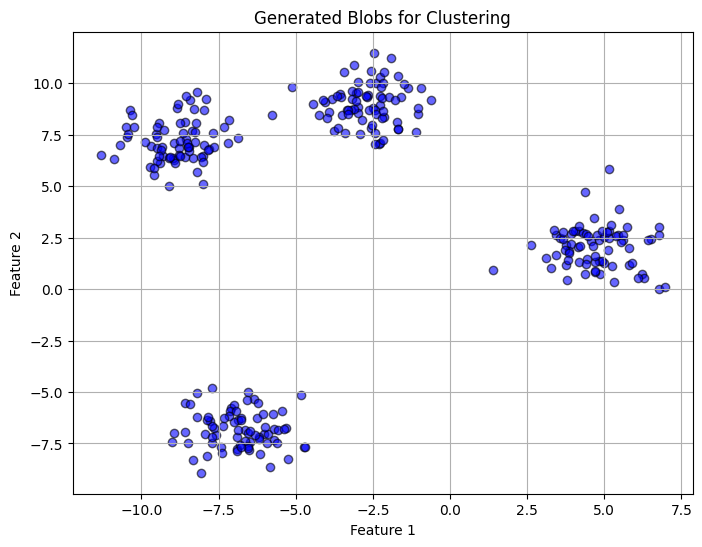

In [24]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolors='k', alpha=0.6)

# Formatting
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Blobs for Clustering")
plt.grid(True)

# Show the plot
plt.show()

In [25]:
y_pred

array([3, 3, 0, 1, 3, 1, 4, 1, 0, 4, 0, 2, 0, 0, 3, 0, 3, 4, 0, 0, 2, 0,
       1, 3, 0, 3, 3, 1, 1, 4, 0, 4, 3, 2, 3, 0, 3, 1, 3, 1, 2, 0, 3, 1,
       0, 0, 3, 4, 3, 2, 1, 3, 1, 0, 1, 4, 3, 2, 4, 0, 3, 2, 2, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 0, 1, 0, 0, 3, 0, 1, 3, 3, 2,
       2, 4, 3, 0, 3, 0, 0, 3, 1, 0, 3, 3, 4, 4, 4, 0, 0, 0, 0, 0, 1, 3,
       2, 0, 0, 0, 0, 2, 3, 1, 3, 1, 1, 1, 0, 3, 1, 3, 3, 0, 3, 1, 2, 0,
       0, 0, 0, 4, 2, 3, 0, 1, 0, 4, 1, 0, 4, 4, 2, 4, 1, 0, 0, 3, 2, 1,
       0, 4, 1, 3, 3, 4, 0, 3, 1, 3, 2, 3, 1, 0, 0, 0, 0, 0, 1, 4, 4, 1,
       1, 4, 2, 1, 3, 0, 3, 2, 4, 3, 1, 0, 4, 4, 1, 1, 1, 3, 4, 1, 1, 2,
       4, 3, 0, 0, 1, 4, 0, 1, 1, 3, 1, 0, 0, 1, 1, 4, 3, 1, 3, 3, 0, 3,
       3, 1, 3, 1, 4, 4, 3, 3, 4, 4, 4, 3, 0, 1, 2, 1, 3, 4, 3, 3, 3, 1,
       1, 2, 3, 1, 1, 1, 3, 1, 3, 1, 3, 2, 1, 3, 4, 0, 3, 0, 4, 0, 3, 0,
       1, 4, 1, 2, 2, 0, 0, 1, 4, 4, 3, 3, 1, 0, 0, 4, 4, 4, 2, 1, 3, 2,
       1, 2, 4, 1, 0, 1, 2, 0, 3, 0, 4, 0, 3, 3], d

In [26]:
y_pred is kmeans.labels_

True

In [27]:
kmeans.cluster_centers_

array([[-2.70981136,  8.97143336],
       [-6.83235205, -6.83045748],
       [ 5.6389548 ,  1.42800831],
       [-8.87357218,  7.17458342],
       [ 4.20028307,  2.38705276]])

In [28]:
import numpy as np

X_new = np.array([[0,2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([4, 4, 0, 0], dtype=int32)

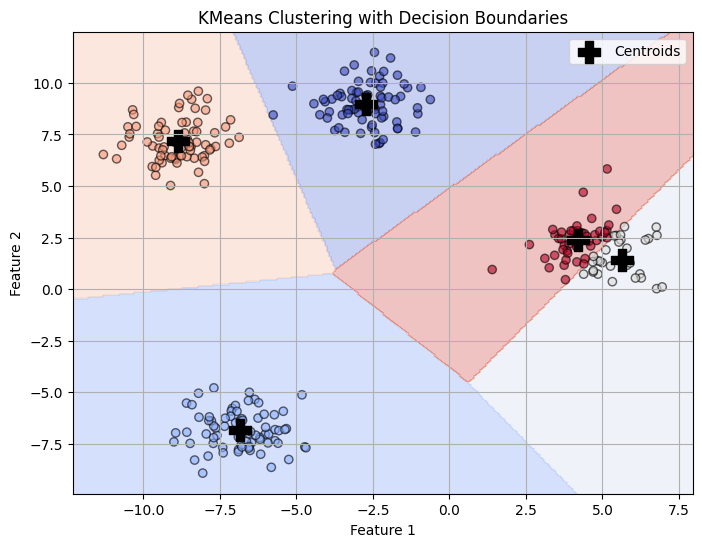

In [29]:
# Generate a meshgrid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Predict cluster labels for each point in the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Plot original data points with cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='coolwarm', edgecolors='k', alpha=0.6)

# Plot new data points
#plt.scatter(X_new[:, 0], X_new[:, 1], c='yellow', edgecolors='k', marker='X', s=200, label="New Points")

# Mark cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='black', marker='P', s=250, label="Centroids")

# Formatting
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KMeans Clustering with Decision Boundaries")
plt.legend()
plt.grid(True)

# Show the plot

In [18]:
kmeans.transform(X_new).round(2)

array([[ 3.45,  9.36, 11.19,  7.42, 11.21],
       [ 1.15, 12.04, 13.2 ,  8.94, 13.86],
       [ 6.27,  6.3 , 10.63,  5.95,  8.15],
       [ 6.3 ,  6.61, 10.16,  6.45,  8.45]])

Start by placing the centroids randomly (picking k instances at random from the dataset and using their locations as centroids). Then label the instances, update the centroids, label the instances, update the centroids, and so on until the centroids stop moving.

KMeans is guaranteed to converge in a finite number of steps. That's because the mean squared distance between the instances and their closest centroids can only go down at each step, and since it cannot be negative, it's guaranteed to converge.

(This is fast)

In [19]:
# to get a better random start so the cluster separation is clearer
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

model's inertia is the performance metric, which is the sum of the squared distances between the instances and their closest centroids

In [21]:
kmeans.inertia_

2055.694257408463

In [22]:
kmeans.score(X)

-2055.6942574084624

In [23]:
# mini-batch, if dataset does not fit in memory we can use memmap or partial_fit()
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [30]:
# finds best value for number of clusters: silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.6641874438840668

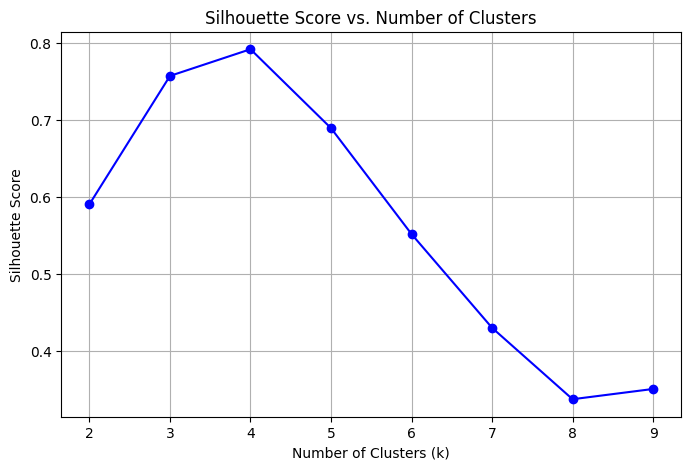

In [31]:
# Range of cluster numbers to test
k_values = range(2, 10)
silhouette_scores = []

# Compute silhouette scores for different cluster values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')

# Formatting
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.grid(True)
plt.xticks(k_values)

# Show the plot
plt.show()

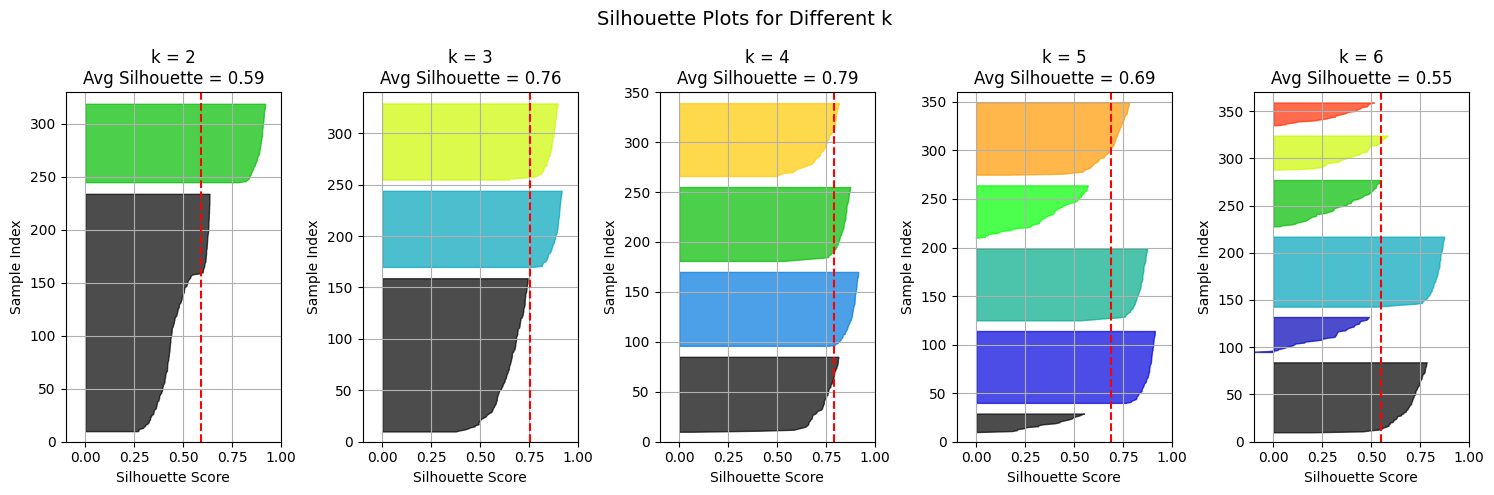

In [34]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Define the range of clusters to analyze
k_values = [2, 3, 4, 5, 6]  # You can extend this range

# Create subplots for each k
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))

for i, k in enumerate(k_values):
    ax = axes[i]
    
    # Fit KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    
    # Compute silhouette scores
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10  # Space between silhouette plots
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (k + 1) * 10])
    
    for j in range(k):
        # Extract silhouette scores for the current cluster
        cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        cluster_silhouette_values.sort()

        size = len(cluster_silhouette_values)
        y_upper = y_lower + size

        color = cm.nipy_spectral(float(j) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10  # Add space between clusters
    
    # Formatting
    ax.set_title(f"k = {k}\nAvg Silhouette = {silhouette_avg:.2f}")
    ax.set_xlabel("Silhouette Score")
    ax.set_ylabel("Sample Index")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.grid(True)

# Show plots
plt.suptitle("Silhouette Plots for Different k", fontsize=14)
plt.tight_layout()
plt.show()

^ k=4 seems best

In [35]:
### Using KMeans for image color segmentation (instead of CNN)
import PIL

image = np.asarray(PIL.Image.open('./ladybug.png'))
image.shape

(533, 800, 3)

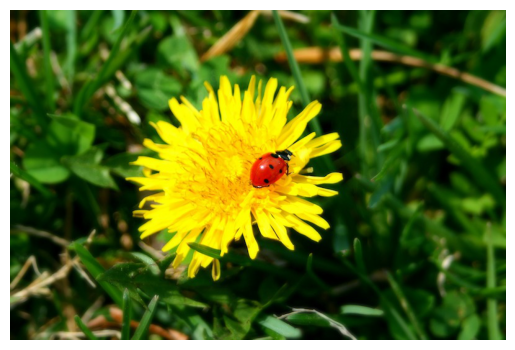

In [38]:
# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

image is a 3D array, first dimension is height, second width, third is color channels

Reshapes the array to get a long list of RGB colors, then it clusters w/ eight clusters. It creates a segmented_img array containing the nearest cluster center for each pixel (i.e., the mean color of each pixel's cluster), then it reshapes this array to the original image shape.

In [43]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

(-0.5, 799.5, 532.5, -0.5)

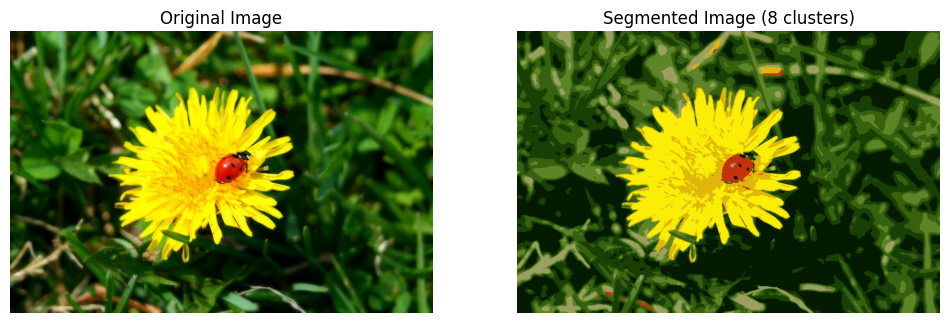

In [45]:
# Convert to uint8 for proper display
segmented_img = segmented_img.astype(np.uint8)

# Plot original and segmented images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(segmented_img)
ax[1].set_title("Segmented Image (8 clusters)")
ax[1].axis("off")

clustering reduces colors, making the matrix sparser, which helps optimize training. If you’re working with CNNs or autoencoders, this can be a great preprocessing step!

In [47]:
### Semi-supervised some labels are labeled but most aren't
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

we'll pretend to have 50 labels, the test set must be labeled

In [48]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [49]:
log_reg.score(X_test, y_test)

0.7581863979848866

representative images, images that are closest to centroid

In [52]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

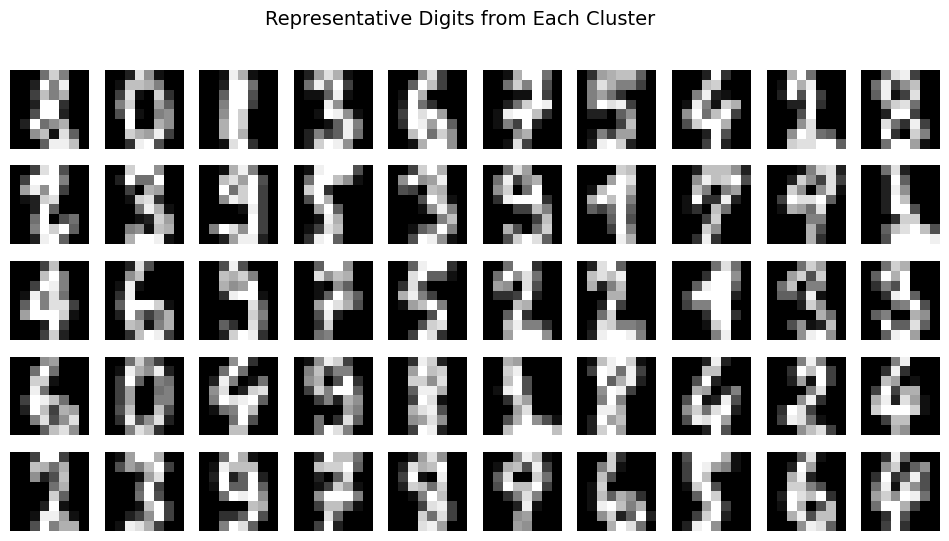

In [54]:
# Determine image size automatically
image_size = int(np.sqrt(X_train.shape[1]))
X_representative_digits = X_representative_digits.reshape(k, image_size, image_size)

# Plot representative digits
fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(12, 6))
for ax, img in zip(axes.flat, X_representative_digits):
    ax.imshow(img, cmap="gray")
    ax.axis("off")

plt.suptitle("Representative Digits from Each Cluster", fontsize=14)
plt.show()

In [55]:
y_representative_digits = np.array([8, 0, 1, 3, 6, 7, 5, 4, 1, 8, 2, 3, 9, 5, 3, 9, 1, 7, 9, 1, 4, 6, 9, 7, 5, 2, 2, 1, 3, 3, 6, 0, 4, 9, 8, 1, 7, 4, 2, 4, 2, 3, 9, 7, 9, 9, 6, 5, 6, 4])

In [59]:
log_reg = LogisticRegression(max_iter=10_000)
X_representative_digits = X_representative_digits.reshape(k, -1) # reshape back because we did this for the visual
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8035264483627204

^ 80% accuracy with 50 labels!

In [61]:
# propagated labels to all other instances in same cluster
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [62]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

/Users/mathias/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7732997481108312

In [63]:
# remove outliers computes largest distances the 1% and sets them to -1
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [64]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.7909319899244333

In [65]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.8970370370370371

Nest step in this process could be with active learning where an expert can label th emost uncertain instances until the performance stops being worth the labeling effort

### DBSCAN density-based spatial clustering of applications with noise

counts how many instances are located within a small distance e (epsilon) from it core instances are localed in dense regions. A long sequence of neighboring core instances forms a single cluster

In [73]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.20, min_samples=5) # .20 works better than 0.05
dbscan.fit(X)

DBSCAN(eps=0.2)

In [67]:
dbscan.labels_

array([ 0,  1,  0,  0,  0,  0,  0,  0,  2,  0,  2,  2,  2,  0,  0, -1, -1,
        0,  2,  0,  2,  0,  0,  0,  3,  0,  3,  1,  2,  3,  1,  0,  2,  0,
        0, -1,  2,  0,  0,  3,  2,  1,  2,  0,  0,  2,  3,  2,  3,  1,  3,
        2,  2, -1,  2,  4, -1,  2,  0,  2,  4,  2,  0,  0,  0,  2,  0,  0,
        2,  3,  0,  2, -1,  1,  0,  0,  2,  3,  3,  0,  0,  0,  2,  1, -1,
        1,  2, -1,  4,  0,  3,  2,  0,  3, -1, -1,  1,  2,  0,  0,  0,  0,
        2,  3,  3,  2,  0, -1,  2,  0,  2, -1,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  2,  0,  3,  2,  3,  1,  0,  2,  0, -1,  0,  4,  0,  0,  0,
        0,  0,  1,  2,  0,  0,  2,  3,  2,  0,  2,  4,  3,  1,  0,  2,  0,
        0,  3, -1,  0, -1, -1,  0,  0,  0,  2,  0,  0,  2,  0,  1,  2,  2,
        0,  0,  3,  3,  2, -1,  3,  3,  0,  3,  2,  0,  2,  0,  0,  0,  4,
        4,  0,  4,  0,  2,  1,  2,  2,  0,  1,  0,  0,  2,  0,  0,  0,  2,
        3,  3,  1,  0,  1,  2,  3,  2,  0,  4,  2,  2,  1,  2,  2,  4,  0,
       -1,  2,  0,  1,  0

^ -1 are anomalies by the algorithm

In [69]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  17,  18,  19,  20,  22,  23,  24,  25,  27,  28,  29,
        31,  32,  34,  36,  37,  38,  39,  41,  42,  43,  44,  45,  46,
        47,  49,  50,  51,  52,  54,  55,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  73,  76,  77,  80,
        83,  85,  86,  88,  91,  92,  93,  96,  98,  99, 101, 102, 103,
       104, 105, 106, 108, 109, 110, 112, 113, 114, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 128, 129, 131, 132, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149,
       151, 152, 153, 154, 156, 159, 160, 161, 162, 163, 164, 165, 166,
       168, 169, 170, 171, 172, 173, 174, 176, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 190, 192, 193, 194, 196, 197, 198, 199,
       200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 214,
       215, 216, 217, 218, 219, 220, 223, 224, 225, 226, 228, 23

In [70]:
dbscan.components_

array([[ 0.29537585, -0.23222517],
       [ 1.09935278,  0.07704613],
       [ 0.54030791, -0.42838651],
       ...,
       [ 0.07578921,  0.01488535],
       [ 0.71701758,  0.66918205],
       [ 0.14245148,  0.02758107]])

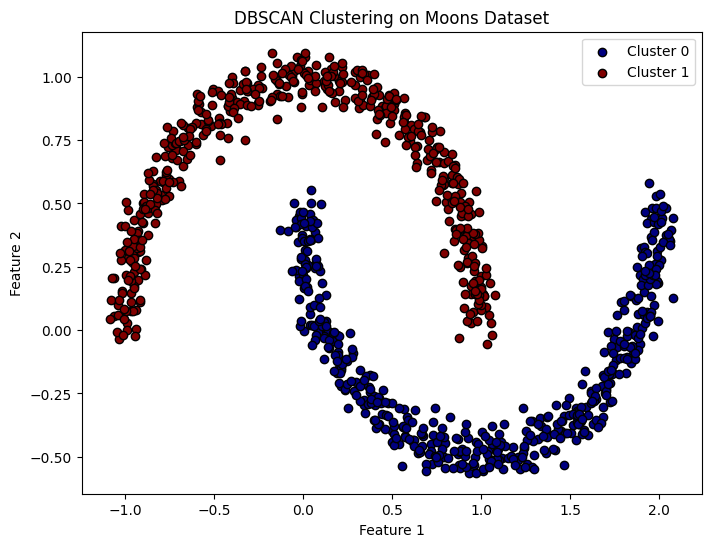

In [74]:
labels = dbscan.fit_predict(X)  # Get cluster labels (-1 means noise)

# Plot clusters
plt.figure(figsize=(8, 6))
unique_labels = set(labels)

for label in unique_labels:
    if label == -1:
        # Noise points (label = -1) in black
        color = "black"
        label_name = "Noise"
    else:
        # Other clusters in different colors
        color = plt.cm.jet(float(label) / max(unique_labels))  # Unique color for each cluster
        label_name = f"Cluster {label}"

    plt.scatter(X[labels == label, 0], X[labels == label, 1], c=[color], label=label_name, edgecolors="k")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering on Moons Dataset")
plt.legend()
plt.show()

DBSCAN cannot predict which cluster a new instance belongs to (no `predict()` but has `fit_predict()`)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [76]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [77]:
knn.predict_proba(X_new)

array([[0.2, 0.8],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ]])

In [78]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

/var/folders/dt/x2hsbqvj7bsd0klwc9f8ff8m0000gn/T/ipykernel_52523/535524587.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  color = "black" if y_pred[i] == -1 else plt.cm.jet(float(y_pred[i]) / max(unique_labels))


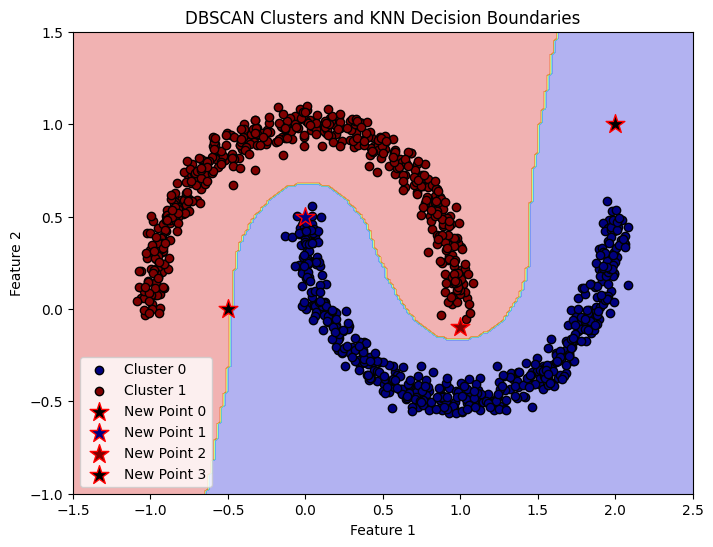

In [81]:
xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, 200), np.linspace(-1, 1.5, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(X_grid)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.jet)

# Plot original dataset with DBSCAN labels
unique_labels = set(dbscan.labels_)
for label in unique_labels:
    color = "black" if label == -1 else plt.cm.jet(float(label) / max(unique_labels))
    plt.scatter(X[dbscan.labels_ == label, 0], X[dbscan.labels_ == label, 1], c=[color], edgecolors="k", label=f"Cluster {label}" if label != -1 else "Noise")

# Plot new instances with predicted labels
for i, point in enumerate(X_new):
    color = "black" if y_pred[i] == -1 else plt.cm.jet(float(y_pred[i]) / max(unique_labels))
    plt.scatter(point[0], point[1], c=[color], edgecolors="red", s=200, marker="*", label=f"New Point {i}")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clusters and KNN Decision Boundaries")
plt.legend()

two new instances are far away from both clusters are anomalies (there are no anomalies in the training set)

Hierarchiacal DBSCAN (HDBSCAN) is better at finding clusters of varying densities

There are other types of clustering algorithms:
- Agglomerative clustering
  builds a hierarchy of clusters from the bottom up by iteratively merging the closest
  clusters, forming a binary tree structure that captures various cluster shapes and provides
  flexibility, though scalability depends on using a connectivity matrix.
- BIRCH
  limited memory huge datasets
- Mean-shift
  iteratively shifts data points toward higher density regions, forming clusters around local
  density peaks but struggling with large datasets due to its high computational complexity.
- Affinity propaagation
   clusters data by having instances exchange messages to elect central exemplars,
  automatically determining the number of clusters without requiring prior specification.
- Spectral clustering
  reduces a similarity matrix to a lower-dimensional space and applies clustering (like k
  means), capturing complex structures but struggling with large datasets and varying cluster
  sizes.

### Gaussian Mixture model (GMM)

assumes instances were generated from a mixture of several Gaussian distributions

In [83]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [84]:
gm.weights_

array([0.61429886, 0.19928025, 0.18642089])

In [85]:
gm.means_

array([[ 0.51623449,  0.23703584],
       [-0.75587023,  0.5485858 ],
       [ 1.77846189, -0.0264001 ]])

In [86]:
gm.covariances_

array([[[ 0.18702136, -0.11585853],
        [-0.11585853,  0.29388397]],

       [[ 0.04934038,  0.05790178],
        [ 0.05790178,  0.08332185]],

       [[ 0.03725414,  0.04995147],
        [ 0.04995147,  0.08201903]]])

initializes the cluster parameters randomly, then it repeats two steps until convergence,
first assigning instances to clusters (this is called the expectation step) and then
updating the clusters (this is called the maximization step)

uses soft cluster assignments, not hard

In [87]:
gm.converged_

True

In [88]:
gm.n_iter_

21

In [89]:
gm.predict(X)

array([0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 2, 2, 0, 0, 2, 1, 1, 0,
       2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 1, 0, 1, 0,

In [90]:
gm.predict_proba(X).round(3) # soft clustering

array([[1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.999, 0.001, 0.   ],
       ...,
       [1.   , 0.   , 0.   ],
       [0.033, 0.967, 0.   ],
       [0.044, 0.   , 0.956]])

soft vs hard is estimating or assign respectively

In [91]:
X_new, y_new = gm.sample(6)
X_new

array([[ 0.91780397, -0.80044246],
       [ 0.01937459,  0.26461895],
       [ 0.12701457,  0.76228654],
       [ 0.53246622,  0.91674265],
       [-0.73845887,  0.49722864],
       [ 1.97594051,  0.23330362]])

In [92]:
y_new

array([0, 0, 0, 0, 1, 2])

In [93]:
gm.score_samples(X).round(2) # estimates the log of the PDF at that location

array([-1.3 , -1.68, -2.  , -2.56, -1.15, -1.27, -1.44, -1.77, -1.23,
       -1.32, -0.67, -0.84, -1.67, -2.44, -1.33, -0.25, -1.34, -1.53,
       -0.15, -1.53, -1.83, -0.22, -1.73, -0.07, -1.93, -1.75, -1.73,
       -1.77, -2.02,  0.18, -0.89, -1.05, -1.73, -2.33, -1.39, -0.51,
       -1.49, -1.39, -1.47, -0.93, -2.17, -0.58, -1.38, -1.46, -1.69,
        0.08, -0.85, -1.52, -1.83, -1.59, -1.7 , -1.67, -1.45, -1.43,
       -0.55, -1.39, -1.46, -1.69, -2.12, -1.2 , -1.76, -1.72, -1.64,
        0.09, -1.53, -0.06, -0.47, -0.7 , -2.02, -1.55, -2.02, -1.59,
       -1.61, -1.5 , -1.22, -1.55, -1.76, -1.55, -1.65, -1.35, -0.19,
       -1.53,  0.09, -2.25, -1.05, -2.27, -1.65, -1.6 , -0.69, -1.59,
       -1.6 , -1.49, -1.4 , -1.56, -1.66, -1.69, -0.05, -2.32, -2.4 ,
       -1.2 , -2.51, -1.29, -0.64, -1.8 , -0.03, -1.66, -1.15, -1.75,
       -1.98, -0.39, -1.83, -1.56, -0.34, -1.78, -0.34, -1.42, -1.06,
       -1.62, -1.85, -0.97, -1.82, -0.15, -2.05, -2.42,  0.06, -0.6 ,
       -2.09, -1.59,

The greater the score the higher the density

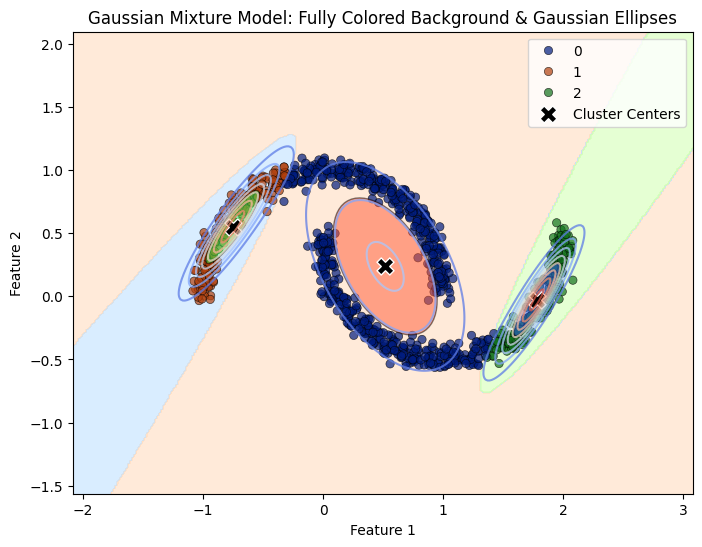

In [106]:
import seaborn as sns
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# Generate a grid over the feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict cluster labels for decision regions
labels = gm.predict(grid_points).reshape(xx.shape)

# Compute log probabilities for density contours
log_probs = gm.score_samples(grid_points)
probs = np.exp(log_probs).reshape(xx.shape)

# Define colors for decision regions (full background)
background_colors = ListedColormap(["#FFDDC1", "#C1E1FF", "#D4FFB7"])  # Soft, distinct colors

# Define colors for the ellipses
ellipse_colors = ["#FF5733", "#33FF57", "#3357FF"]  # Stronger contrast

# Create plot
plt.figure(figsize=(8, 6))

# Step 1: **Fill entire background** (decision regions)
plt.contourf(xx, yy, labels, cmap=background_colors, alpha=0.6)

# Step 2: Plot data points with cluster-based coloring
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=gm.predict(X), palette='dark', edgecolor='k', alpha=0.7)

# Step 3: Plot density contours (for visual clarity)
plt.contour(xx, yy, probs, levels=10, cmap="coolwarm", alpha=0.75)

# Function to plot **filled ellipses** with unique colors
def plot_gaussian_ellipse(mean, cov, color, ax):
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))  # Compute rotation angle
    width, height = 2 * np.sqrt(eigenvalues)  # Scale to 2 standard deviations
    ellipse = Ellipse(mean, width, height, angle=angle, 
                      edgecolor="black", facecolor=color, alpha=0.5, linestyle="solid")
    ax.add_patch(ellipse)

# Step 4: Overlay **filled ellipses** for each Gaussian cluster
ax = plt.gca()
for i, (mean, cov) in enumerate(zip(gm.means_, gm.covariances_)):
    plot_gaussian_ellipse(mean, cov, ellipse_colors[i], ax)

# Step 5: Highlight **cluster centers**
plt.scatter(gm.means_[:, 0], gm.means_[:, 1], c='black', marker='X', s=150, edgecolor='white', label='Cluster Centers')

plt.legend()
plt.title("Gaussian Mixture Model: Fully Colored Background & Gaussian Ellipses")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

if the model has trouble converging we can set the `covariance_type` hyperparameter to:
- spherical
- diag
- tied

default is full

Finding anomalies 2% instances below the density threshold (fourth percentile)

In [107]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities < density_threshold]

A similar task is novelty detection but this assumes a "clean" dataset uncontaminated by outliers

you could fit the model to detect outliers then remove then fit again or use `EllipticEnvelope` <- requires a little more research

### Selecting number of clusters

with k-means you can use inertia or silhouette score, with Gaussian mixtures we have to find the model that minimizes theoretical information:
- Bayesian information criterion (BIC)
- Akaike information criterion (AIC)

### Bayesian Information Criterion (BIC)
$$
BIC = k \ln(n) - 2 \ln(\hat{L})
$$
where:  
- \( k \) is the number of parameters in the model  
- \( n \) is the number of data points  
- \( \hat{L} \) is the maximum likelihood of the model  

### Akaike Information Criterion (AIC)
$$
AIC = 2k - 2 \ln(\hat{L})
$$
where:  
- \( k \) is the number of parameters in the model  
- \( \hat{L} \) is the maximum likelihood of the model  

penalize models that have more parameters to learn, and reward models that fit the data well

probability: how plausible a future outcome x is (knowing the parameter values)
likelihood: how lausible a set of parameter values are after x is known

- **MLE** maximizes the likelihood function.  
- **MAP** maximizes the likelihood function with a prior distribution.  
- **Log-likelihood** simplifies the math by turning products into sums, making maximization easier.
  $$
\log(ab) = \log(a) + \log(b)
$$
- Once \( \theta \) is estimated, you calculate \( \mathcal{L} \), the likelihood value, to compute **AIC** and **BIC**.

In [110]:
gm.bic(X)

2758.1189905605784

In [111]:
gm.aic(X)

2674.687150817882

### `BayesianGaussianMixture` will find optimal number of clusters rather than manually searching

we still need to set n_components to a value you believe is greater than optimal number of clusters

In [112]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

array([0.14, 0.06, 0.12, 0.15, 0.11, 0.16, 0.13, 0.11, 0.  , 0.  ])

^ 8 clusters are needed 

Gaussian mixture models: although they work great on clusters
with ellipsoidal shapes, they don’t do so well with clusters of very different shapes.

Other Algorithms for anomaly and novelty detection
- Fast-MCD (min covariance determinant): outlier detection
- Isolation forest: outlier detection
- Local outlier factor (LOF): outlier detection
- One-class SVM: novelty detection, does not scale to large datasets
- PCA `inverse_transform()`: efficient anomaly detection